In [1]:
import pandas as pd
import os 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
from tensorflow import keras

def npz_to_dataFrame():
    label = 0
    df = pd.DataFrame(columns = ["Name", "Label"])
    for file_name in file:
        #if file_name[10] == '2':
        if file_name[7] == '1' or file_name[7] == '2' or file_name[7] == '3':
            label = 0
        elif file_name[7] == '5' or file_name[7] == '7':
            label = 1
        numpy_data = np.array([[file_name,label]])
        df2 = pd.DataFrame(data = numpy_data, columns = ["Name", "Label"])
        df = df.append(df2, ignore_index = True)   
    return(df)
    
    
file = os.listdir("/Users/sanjay/Desktop/Audio-Embedding/npz-values/")    
df = npz_to_dataFrame()
df1 = df.drop([174,861])
df = df1

print(len(df))
train_y = df.Label
train_y = np.array(train_y)
#y = y.reshape(-1, 1)
train_x = df.drop('Label', axis = 1)
'''enc = OneHotEncoder()
y = enc.fit(y).categories
print(y)'''
file = os.listdir("/Users/sanjay/Desktop/Audio-Embedding/test_npz_values/")    
df = npz_to_dataFrame()
'''df1 = df.drop([210,1088])
df = df1'''
print(len(df))
test_y = df.Label
test_y = np.array(test_y)
#y = y.reshape(-1, 1)
test_x = df.drop('Label', axis = 1)



'''test_y = to_categorical(test_y)
train_y = to_categorical(train_y)
'''


Using TensorFlow backend.


1140
300


'test_y = to_categorical(test_y)\ntrain_y = to_categorical(train_y)\n'

In [2]:
print(test_y)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '1' '1' '1' '1' '0' '0' '1' '1' '0' '0' '0' '1' '0' '1' '1' '1' '1' '0'
 '1' '1' '1' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '0' '0' '1' '1' '1' '0' '0' '0' '1' '0' '0' '0' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '0' '0'
 '0' '1' '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '0' '0' '0' '0' '0' '1' '0' '1' '1' '1' '1' '0' '0' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '1' '0' '0' '1'
 '1' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '0' '1

In [11]:
def get_train_data(df, max_len):
    numpy_array = []
    numpy_array_2 = []
    zero_array = np.array([0]*512)
    for i in range(len(df)):
        try:
            numpy_array_name = df.iloc[i].Name
            numpy_array = np.load("/Users/sanjay/Desktop/Audio-Embedding/npz-values/" + numpy_array_name, allow_pickle=True)
            numpy_array_1 = numpy_array.f.arr_0
            numpy_array_2.append(numpy_array_1)
            
        except:
            print(i)
    numpy_array_3 = [[[]]]
    for i in range(len(numpy_array_2)):
        numpy_array_2[i] = np.transpose(numpy_array_2[i])
        if max_len - len(numpy_array_2[i]) != 0:
            for j in range((max_len - len(numpy_array_2[i]))):
                numpy_array_2[i] = np.append(numpy_array_2[i],[zero_array],axis = 0)
        numpy_array_2[i] = np.transpose(numpy_array_2[i])
    for i in range(len(numpy_array_2)):
        for j in range(len(numpy_array_2[i])):
            k = 0
            l = 0
            while k<=519:
                numpy_array_3.append(sum(numpy_array_2[i][j][k:k+10])/10)
                k += 10    
            numpy_array_3.append(sum(numpy_array_2[i][j][k:k+5])/5)
    return np.array(numpy_array_3)
    

In [12]:
def get_test_data(df, max_len):
    numpy_array = []
    numpy_array_2 = []
    zero_array = np.array([0]*512)
    for i in range(len(df)):
        try:
            numpy_array_name = df.iloc[i].Name
            numpy_array = np.load("/Users/sanjay/Desktop/Audio-Embedding/test_npz_values/" + numpy_array_name, allow_pickle=True)
            numpy_array_1 = numpy_array.f.arr_0
            numpy_array_2.append(numpy_array_1)
            
        except:
            print(i)
    
    numpy_array_3 = [[[]]]
    for i in range(len(numpy_array_2)):
        numpy_array_2[i] = np.transpose(numpy_array_2[i])
        if max_len - len(numpy_array_2[i]) != 0:
            for j in range((max_len - len(numpy_array_2[i]))):
                numpy_array_2[i] = np.append(numpy_array_2[i],[zero_array],axis = 0)
        numpy_array_2[i] = np.transpose(numpy_array_2[i])
    for i in range(len(numpy_array_2)):
        for j in range(len(numpy_array_2[i])):
            k = 0
            l = 0
            while k<=519:
                numpy_array_3.append(sum(numpy_array_2[i][j][k:k+10])/10)
                k += 10    
            numpy_array_3.append(sum(numpy_array_2[i][j][k:k+5])/5)
    return np.array(numpy_array_3)
    

In [13]:
def get_maxlen(df):
    numpy_array = []
    numpy_array_2 = []
    for i in range(len(df)):
            numpy_array_name = df.iloc[i].Name
            numpy_array = np.load("/Users/sanjay/Desktop/Audio-Embedding/npz-values/" + numpy_array_name, allow_pickle=True)
            numpy_array_1 = numpy_array.f.arr_0
            numpy_array_2.append(numpy_array_1)
    max_len = 0
    for i in range(len(numpy_array_2)):
        for j in range(len(numpy_array_2[i])):
            if len(numpy_array_2[i][j]) > max_len:
                max_len = len(numpy_array_2[i][j])
    return max_len, numpy_array_2

In [14]:
#max_len , numpy_array_2 = get_maxlen()
max_len = 525 #maximum duration of the audio
x_train = get_train_data(train_x, max_len)
x_train = x_train[1:]
x_train = np.array(x_train)
x_train= x_train.reshape((1140, 53, 512))

x_test = get_test_data(test_x, max_len)
x_test = x_test[1:]
x_test = np.array(x_test)
x_test= x_test.reshape((300, 53, 512))

print(x_test.shape, x_train.shape, train_y.shape, test_y.shape)



(300, 53, 512) (1140, 53, 512) (1140,) (300,)


In [15]:
x_train = np.asarray(x_train).astype(np.float32)
train_y = np.asarray(train_y).astype(np.float32)
x_test =  np.asarray(x_test).astype(np.float32)
test_y = np.asarray(test_y).astype(np.float32)

In [16]:
n_dim = x_train.shape[1]  
n_classes = train_y.shape[0] 
print(n_dim)
print(n_classes)
#print(test_x)

53
1140


In [17]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystop = EarlyStopping(monitor='val_loss', mode='min', patience=75, restore_best_weights=True)
checkpointer = ModelCheckpoint(filepath='/tmp/weights.hdf5', verbose=1, save_best_only=True)


In [18]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm


def create_model():  
    model = Sequential()
    model.add(BatchNormalization(axis=-1, input_shape=(53,512)))
    model.add(GRU(n_dim, dropout = 0.1, return_sequences=False, recurrent_dropout = 0.2))
    model.add(Dense(26,activation = "sigmoid"))
    model.add(Dense(13,activation = "sigmoid"))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))          
    keras.optimizers.Adam(lr=1e-5, decay=1e-6)
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])  
    return model
   
  
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 53, 512)           2048      
_________________________________________________________________
gru (GRU)                    (None, 53)                90153     
_________________________________________________________________
dense (Dense)                (None, 26)                1404      
_________________________________________________________________
dense_1 (Dense)              (None, 13)                351       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 14        
Total params: 93,970
Trainable params: 92,946
Non-trainable params: 1,024
_________________________________________________________________
None


In [19]:
hist = model.fit(x_train, train_y, epochs=80, batch_size=24,
                 validation_data = (x_test[:150], test_y[:150]), callbacks=[earlystop])

Train on 1140 samples, validate on 150 samples
Epoch 1/80
1140/1140 [==============================] - 4s 4ms/sample - loss: 0.6823 - accuracy: 0.5754 - val_loss: 0.6790 - val_accuracy: 0.5867
Epoch 2/80
1140/1140 [==============================] - 3s 2ms/sample - loss: 0.6585 - accuracy: 0.5789 - val_loss: 0.6603 - val_accuracy: 0.5867
Epoch 3/80
1140/1140 [==============================] - 3s 2ms/sample - loss: 0.6302 - accuracy: 0.6798 - val_loss: 0.6311 - val_accuracy: 0.7467
Epoch 4/80
1140/1140 [==============================] - 3s 2ms/sample - loss: 0.5940 - accuracy: 0.7623 - val_loss: 0.5928 - val_accuracy: 0.7533
Epoch 5/80
1140/1140 [==============================] - 3s 2ms/sample - loss: 0.5616 - accuracy: 0.7719 - val_loss: 0.5883 - val_accuracy: 0.7133
Epoch 6/80
1140/1140 [==============================] - 3s 2ms/sample - loss: 0.5289 - accuracy: 0.7912 - val_loss: 0.5776 - val_accuracy: 0.7133
Epoch 7/80
1140/1140 [==============================] - 3s 2ms/sample - loss:

In [20]:
print(sum(hist.history['val_accuracy'])/len(hist.history['val_accuracy']))

0.6975000016391277


In [62]:
print(max(hist.history['accuracy']), max(hist.history['val_accuracy']))

0.99298245 0.7866667


In [21]:
evaluate = model.evaluate(x_test[150:], test_y[150:], batch_size=53)
print(evaluate)

150/150 [==============================] - 0s 375us/sample - loss: 1.3762 - accuracy: 0.6867
[1.376156015396118, 0.68666667]


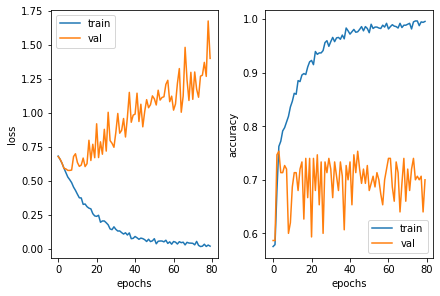

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True)
ax = axs[0]
ax.plot(hist.history['loss'], label='train')
ax.plot(hist.history['val_loss'], label='val')
ax.legend()
ax.set_ylabel('loss')
ax.set_xlabel('epochs')
ax = axs[1] 
ax.plot(hist.history['accuracy'], label='train')
ax.plot(hist.history['val_accuracy'], label='val')
ax.legend()
ax.set_ylabel('accuracy')
ax.set_xlabel('epochs')
plt.show()